In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
# from gensim.models import LdaModel
from gensim.models import LdaSeqModel
import pandas as pd
# import ecopy as ep
import seaborn as sns
import json
from scipy import stats
from scipy.stats import t
import pingouin as pg
import sys
from skbio.diversity.alpha import shannon

/Users/mashrekur/opt/anaconda3/envs/nn_project/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
nTopics = 45

In [3]:
# 45 dtm topics
topic_names = [
'Streamflow',
'Groundwater',
'Wastewater Treatment',
'Ecosystem Studies',
'Hydrobiology',
'Hydrogeology',
'Mass-balance and Transfer',
'Sediment Transport',
'Rainfall-Runoff',
'Stochastic Models',
'Hydrochemistry',
'Microbiology',
'Nutrient and Heavy Metal Removal',
'Systems Hydrology',
'Quantitative Methods',
'Water Treatment',
'Irrigation',  
'Uncertainty',
'Biodegradation',
'Solute Transport',
'Land-Surface Flux',
'Modeling',
'Pollutant Sampling & Monitoring',
'Evaporation & Transpiration',
'Gauging & Monitoring',
'Reservoir Management',
'Pollutant Removal',
'Topography',
'Water Management Solutions',
'Vadose Zone',
'Ecological Modeling',
'Soil Chemistry',
'Water Policy and Planning',
'Surface Water Quality',
'Precipitation',
'Soil and Hydrometeorological Sampling',
'Infiltration',
'Spatial Variability',
'Numerical Modeling',
'Rainfall',
'Sedimentology',
'Groundwater Supply & Demand',
'Aquifers',
'Watershed Features',
'Climate Change Impacts',
]

In [4]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'chamoisee': '#A0785A',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'cadmiumred': '#E30022',
 'royalblue': '#4169E1',
 'americanrose':  '#FF033E',
 'asparagus': '#87A96B',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'cadet':'#536872',
 'navy':'#000080',
 'bondiblue':'#0095B6',
 'blue':'#0000FF',
 'boysenberry':'#873260',
 'khaki':'#F0E68C',
 'cgblue':'#007AA5',
#  'linen':'#FAF0E6',
 'byzantine':'#BD33A4',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
 'darkcyan': '#008B8B',
    
}

# turn into a list
colorlist = []
for i, color in enumerate(custom_colors.values()):
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))
    colorlist[i] = (colorlist[i][0] / 256, colorlist[i][1] / 256, colorlist[i][2] / 256)

In [5]:
# Load model
dtm_model = LdaSeqModel.load('trained_models/dtm_model45')



#load doc-topic distributions
with open('data/dtm_doc_topic_all.pkl', 'rb') as f:
    arr_arr = pkl.load(f)

# Load raw corpus dataframe
with open('data/raw_corpus_broad_dtm.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
#sort dataframe by year

corpus_df_dtm = corpus_df.sort_values('Year', axis = 0, ascending = True, inplace=False)
corpus_df_dtm.reset_index(drop=True, inplace=True)

# creating an array of number of documents by year
time_slice_list = []
time_seq = []
for y, year in enumerate(np.unique(corpus_df_dtm['Year'])):
    time_slice_list.append((year,(corpus_df_dtm['Year']==year).value_counts()[1]))
    
time_slice = np.array(time_slice_list)[:,1].astype(np.int)
time_slice = time_slice.tolist()
time_seq = time_slice
    
    
# Pull years
years = np.unique(corpus_df['Year'])
    
# Create an array of all the doc-topic dist together
topic_dist = []

for y, year in enumerate(years):
    for p in range(time_seq[y]):
        topic_dist.append(arr_arr[y][p])
    
topic_distributions = np.array(topic_dist)


/var/folders/y0/kygdp4c13x56469jnrq5w3z80000gn/T/ipykernel_6441/1328233106.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time_slice = np.array(time_slice_list)[:,1].astype(np.int)


In [6]:
# Pull journals

journals = corpus_df.Journal.unique()



# Pull years

years = np.unique(corpus_df['Year'])

# Pull topics
topics = dtm_model.print_topics(top_terms=20)
topics

[[('flow', 0.14590894375166233),
  ('discharge', 0.05545372190532527),
  ('stream', 0.053449923776802605),
  ('network', 0.047861178652654414),
  ('channel', 0.04694774274029255),
  ('river', 0.035425793275972915),
  ('drainage', 0.03229600085724704),
  ('basin', 0.014696040458538262),
  ('low', 0.013413750176182695),
  ('reach', 0.011544019801079684),
  ('downstream', 0.010703418907382944),
  ('route', 0.009364384619396962),
  ('slope', 0.008676093776521789),
  ('drain', 0.008519484591163895),
  ('length', 0.008239658485272463),
  ('width', 0.00822197238129336),
  ('path', 0.007881254641285985),
  ('stage', 0.007738251180104735),
  ('outflow', 0.007706304092217646),
  ('bank', 0.007371517020116261)],
 [('water', 0.07658573860505084),
  ('groundwater', 0.046694439209385395),
  ('recharge', 0.025717932329164615),
  ('aquifer', 0.016941020337892937),
  ('area', 0.015533746219469994),
  ('table', 0.01550164408599715),
  ('flow', 0.013452421473313497),
  ('system', 0.012058881718034261),
 

In [7]:
# #count number of zero elements in topic_distributions

# df_zero = pd.DataFrame(topic_distributions)


# print('Non-Zero Elements:',np.count_nonzero(df_zero))
# print('Zero Elements:',((74479 * 45) - np.count_nonzero(df_zero)))
# print('Percentage of Zero Elements:',(((74479 * 45) - np.count_nonzero(df_zero))/(74479 * 45))*100,'%')
    

In [8]:
# Create an array of all the doc-topic dist together
topic_dist = []

for y, year in enumerate(years):
    for p in range(time_seq[y]):
        topic_dist.append(arr_arr[y][p])
    
topic_distributions = np.array(topic_dist)


In [9]:
# # Create a dictionary of topic distributions by year
#topic_distributions_year['Year'][paper][topic_weights]

topic_distributions_year = {}

for y, year in enumerate(years):
    
    topic_distributions_year[year] = topic_distributions[corpus_df['Year'] == year]



In [10]:
# Create a dictionary of topic distributions by journal
# topic_distributions_journal['Journal'][paper][topic_weights]

topic_distributions_journal = {}

for j, journal in enumerate(journals):
    
    topic_distributions_journal[journal] = topic_distributions[corpus_df['Journal'] == journal]
    

In [11]:
# Create a dictionary of topic distributions by year & journal
# topic_distributions_journal_year['Journal']['Year]'[paper][topic_weights]

topic_distributions_journal_year = {}

for j, journal in enumerate(journals):
    
    topic_distributions_journal_year[journal] = {}
    
    for y, year in enumerate(years):
        
        topic_distributions_journal_year[journal][year] = topic_distributions[(corpus_df['Journal'] == journal) & (corpus_df['Year'] == year)]



In [12]:
# Define a list of diversity metrics for ecopy/skbio

diversity_metrics = ['shannon']
# diversity_metrics_3 = ['shannon', 'spRich', 'dominance']

In [13]:
# Global diversity metrics
#global_diversity[paper_diversities]

global_diversity = {}

for p in range(0,74479):
    
    global_diversity[p] = shannon(topic_distributions[p])



In [14]:
# global_diversity.values()

In [15]:
# Yearwise diversity metric
# year_diversity['year'][paper_diversities]

year_diversity = {}


for y, year in enumerate(years):

    year_diversity[year] = {}
    
    for p in range(time_seq[y]):
        
        year_diversity[year][p] = shannon(topic_distributions_year[year][p])



In [16]:
year_diversity.keys()

dict_keys(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

In [17]:
len(topic_distributions_journal['WRR'])

12170

In [18]:
# Journalwise diversity metric
# year_diversity['metric']['journal'][paper_diversities]

journal_diversity = {}

for j, journal in enumerate(journals):
    
    journal_diversity[journal] = {}
    
    for p in range(len(topic_distributions_journal[journal])):
        
        journal_diversity[journal][p] = shannon(topic_distributions_journal[journal][p])
    
   

In [19]:
len(journal_diversity['WRR'])

12170

In [20]:
# #Journal-year diversity metric

journal_year_diversity = {}

for j, journal in enumerate(journals):

    journal_year_diversity[journal] = {}

    for y, year in enumerate(years):
        
        journal_year_diversity[journal][year] = {}
        
        for p in range(len(topic_distributions_journal_year[journal][year])):

            if topic_distributions_journal_year[journal][year].size > 0:
                
                journal_year_diversity[journal][year][p] = shannon(topic_distributions_journal_year[journal][year][p])

In [21]:
np.array(list(journal_year_diversity['WRR']['2019'].values())).mean()

2.862812436371228

In [22]:
journal_year_mean_diversity = {}


for j, journal in enumerate(journals):

    journal_year_mean_diversity[journal] = {}

    for y, year in enumerate(years):
        #since some journal data are missing for some years
        if topic_distributions_journal_year[journal][year].size > 0:

            journal_year_mean_diversity[journal][year] = np.array(list(journal_year_diversity[journal][year].values())).mean()

In [23]:
#Are the paper diversities in each journal increasing?
fig = plt.figure(figsize=(150,75), facecolor='white')
# plt.title('Mean Shannon Diversity Per Journal Per Year', fontsize = 400)

# plot numbering starts at 1, not 0
plot_number = 1

for journal in journals:

    ax = fig.add_subplot(6, 3, plot_number)
    ax.plot(journal_year_mean_diversity[journal].keys(), journal_year_mean_diversity[journal].values(), linewidth = 50, color = list(custom_colors.keys())[plot_number])
    ax.tick_params(axis="x", labelsize=50)
    ax.tick_params(axis="y", labelsize=25)
#     ax.set_ylim(1.2,2.0)
    plt.xticks(rotation=45)
    ax.set_title(journal, size = 100)
#     ax.set_xlim(0,29)
    ax.grid()

    # Go to the next plot for the next loop
    plot_number = plot_number + 1

plt.tight_layout()
plt.savefig('figures/mean_shannon_per_journal_per_year.png') 

In [24]:
#calculate statistical significance of trends in per-article journal diversity

# y_list = list(*range(0, len(journal_year_mean_diversity[journal].values()))

for j, journal in enumerate(journals):
    trend_df = pg.corr(np.array(list(range(0, len(journal_year_mean_diversity[journal].values()))))[:-1], np.array(list(journal_year_mean_diversity[journal].values()))[:-1])
    print(journal,',', trend_df['r'][0],',',trend_df['p-val'][0],',',trend_df['BF10'][0])



WRR , 0.9238381041444551 , 2.392422713252284e-12 , 2.769e+09
AWR , 0.685459629277683 , 5.692757297061116e-05 , 513.335
WR , 0.6715309903435597 , 9.137982799952798e-05 , 336.078
JCH , 0.667404459702738 , 0.00010464050688471956 , 297.751
JH , 0.5691141181071906 , 0.0015747790302589604 , 27.064
JWRPM , 0.2760088379845752 , 0.15511206916485812 , 0.615
GW , -0.07905115271885364 , 0.7265733358396613 , 0.28
HSJ , -0.4583704165982547 , 0.01416287105509786 , 4.11
HP , 0.015697713809053188 , 0.9368082581559474 , 0.235
WRM , 0.463586832278305 , 0.02587883815360419 , 2.68
HESS , -0.367974202291193 , 0.09200449913135024 , 1.004
JAWRA , 0.107037128987501 , 0.6354221311150785 , 0.294
HGJ , 0.4296329316642166 , 0.05192542288029831 , 1.589
JHM , -0.2995691271577298 , 0.21276362460904708 , 0.586
WRI , 0.8635352431470733 , 0.1364647568529267 , 1.445
ESWRT , -0.11284273696603991 , 0.8871572630339601 , 0.595
JHREG , -0.7901512910297128 , 0.20984870897028718 , 1.148
ISWCR , 0.8813511360872177 , 0.0481775806

/Users/mashrekur/opt/anaconda3/envs/nn_project/lib/python3.9/site-packages/pingouin/power.py:896: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power "


In [25]:
np.array(list(range(0, len(journal_year_mean_diversity['WRR'].values()))))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [26]:
# #Are the paper diversities in each journal increasing?
# fig = plt.figure(figsize=(100,50), facecolor='white')
# # plt.title('Mean Shannon Diversity Per Journal Per Year', fontsize = 400)

# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:

#     ax = fig.add_subplot(6, 3, plot_number) #, sharex = ax
#     ax.plot(journal_year_mean_diversity['shannon'][journal].keys(), journal_year_mean_diversity['shannon'][journal].values(), linewidth = 20, color = 'blue')
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=50)
# #     ax.set_ylim(1.2,2.0)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/mean_shannon_per_journal_per_year_sharex.png') 

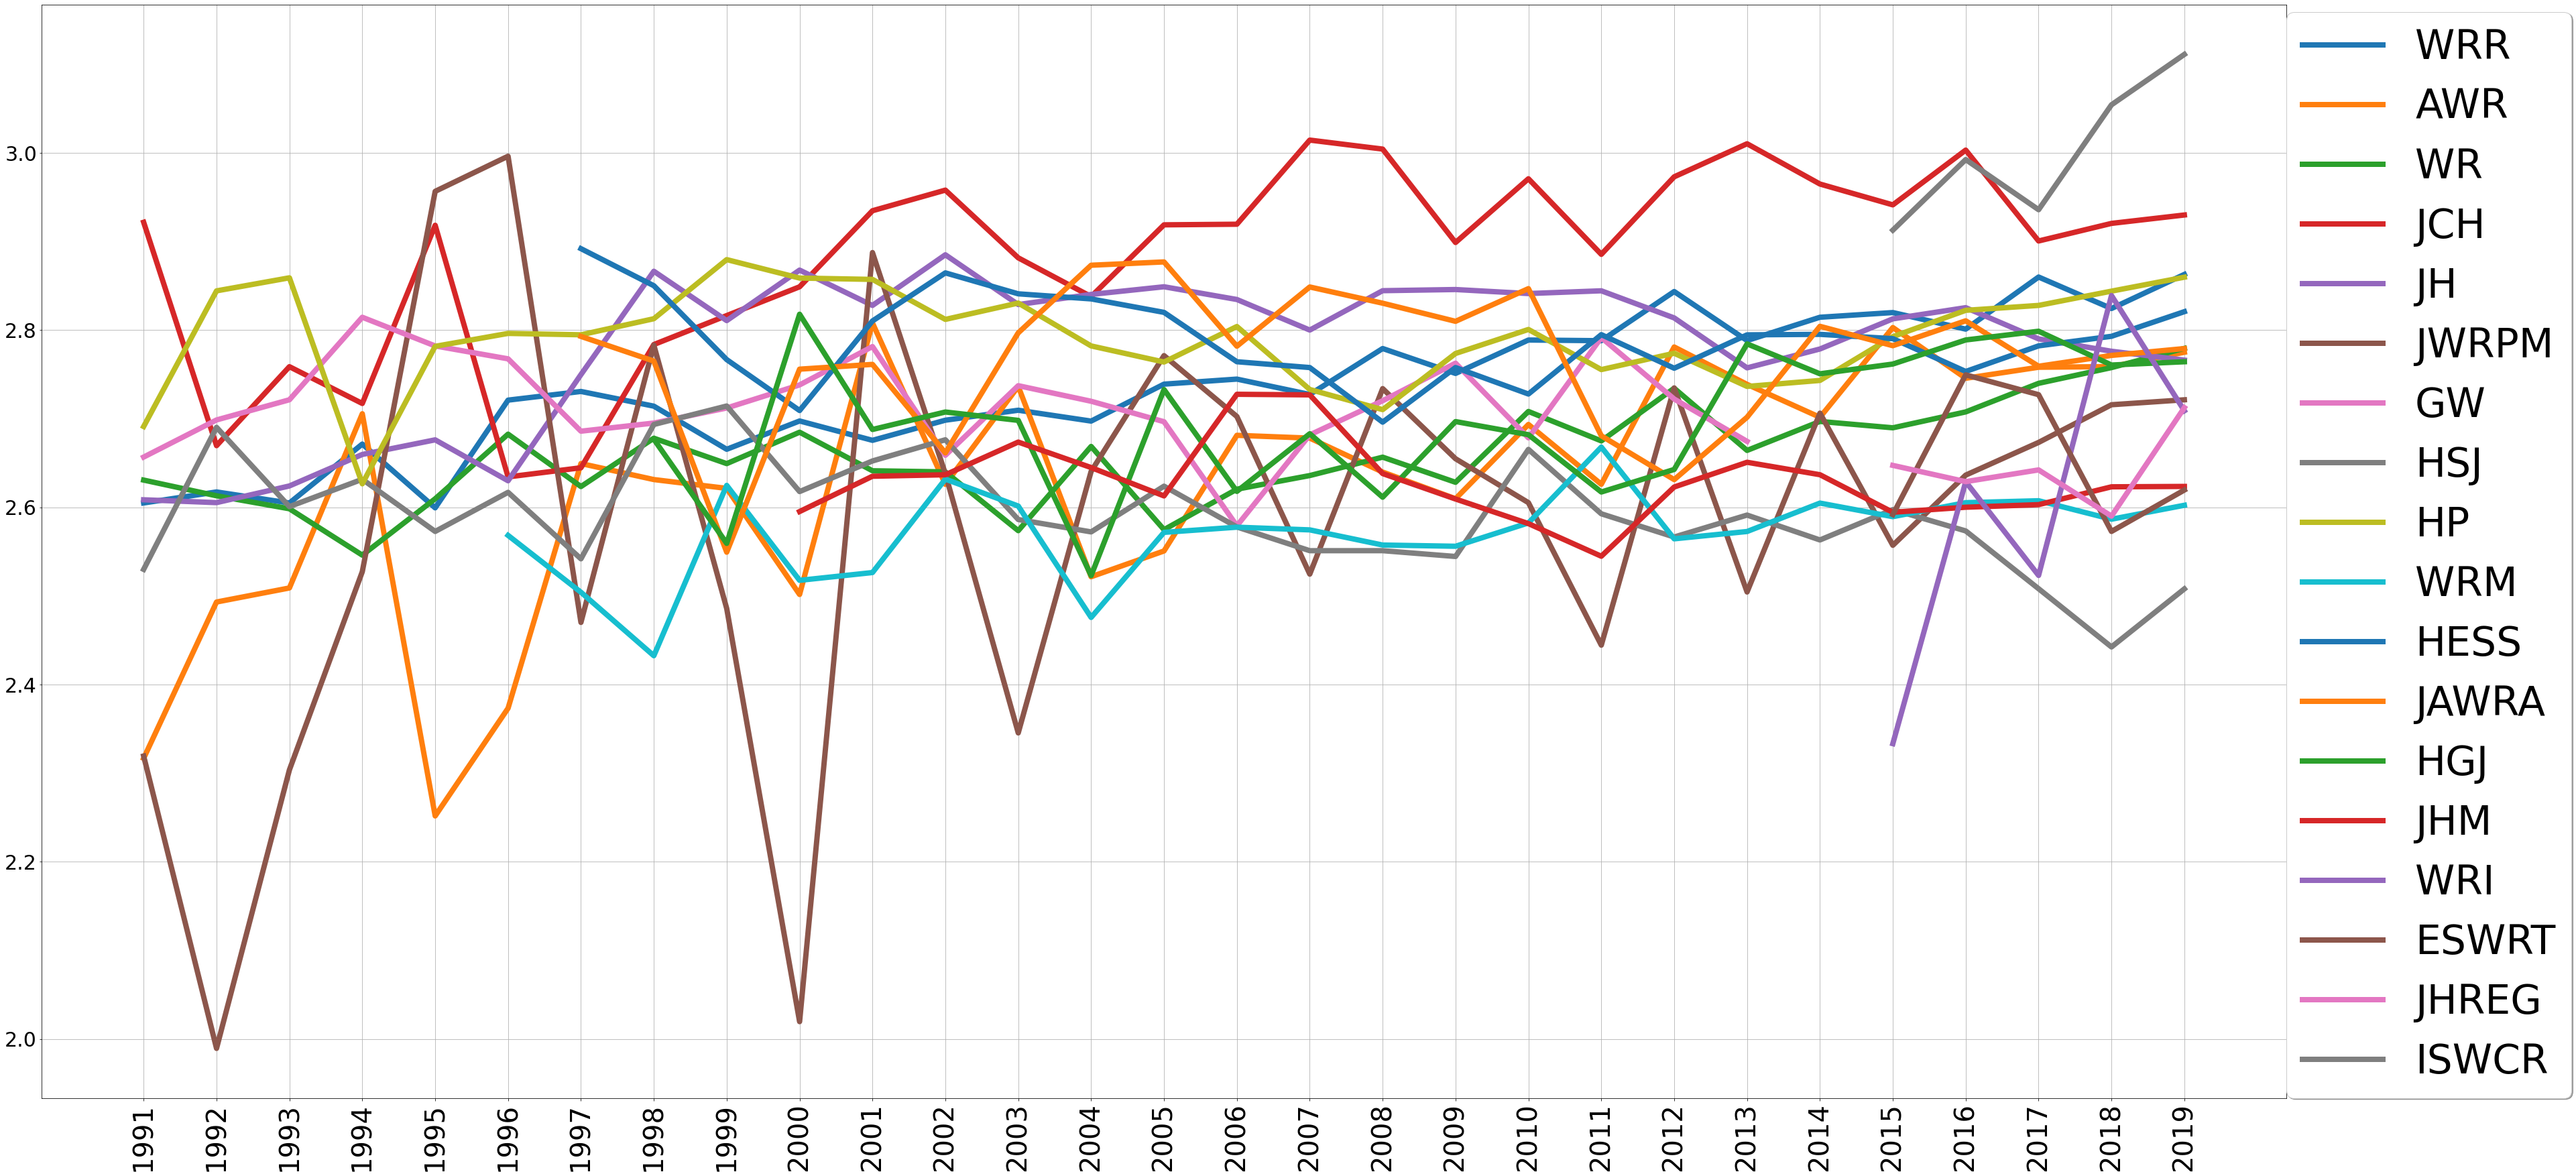

In [27]:
df = pd.DataFrame(journal_year_mean_diversity)
plt.figure(figsize=(60,30))
plt.plot(df[:-1], linewidth = 8)
plt.xticks(size = 40, rotation=90)
plt.yticks(size = 30)
plt.legend(df, prop={'size': 60}, loc =(1,0), shadow = True, fancybox = True)
plt.grid()

plt.savefig('figures/mean_diversity_journal_sharedplot.png')

In [28]:
# np.array(list(global_diversity.values())).shape

In [29]:
# Calculate r values and plotting them.


r_vals_global = {}



for t, topic in enumerate(topic_names):

    r_vals_global[topic] = np.corrcoef(topic_distributions[:,t],np.array(list(global_diversity.values())))[0,1]


fig = plt.figure(figsize=(150,100), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

# for metric in diversity_metrics:
ax = fig.add_subplot(1, 1, plot_number)
ax.bar(topic_names, r_vals_global.values(), color = list(custom_colors.values()))
ax.tick_params(axis="x", labelsize=100)
ax.tick_params(axis="y", labelsize=100)
ax.set_ylim(-0.3,0.3)
ax.set_title('R-values for Statistical Relationship Between Per-Article Shannon Diversity & Topic Distributions', size = 150)
# Go to the next plot for the next loop
plot_number = plot_number + 1
plt.xticks(rotation = 90)
ax.grid()

plt.tight_layout()
plt.savefig('figures/r_shannon_fullcorpus.png')    

In [99]:
r_vals_global

{'Streamflow': 0.14612103528307288,
 'Groundwater': 0.0053601430648560905,
 'Wastewater Treatment': -0.106615480960602,
 'Ecosystem Studies': 0.10757844731384425,
 'Hydrobiology': 0.0852128252485902,
 'Hydrogeology': 0.03926262604842187,
 'Mass-balance and Transfer': 0.07470115328806728,
 'Sediment Transport': 0.13527360886721634,
 'Rainfall-Runoff': 0.07909166981879925,
 'Stochastic Models': -0.005517149296756357,
 'Hydrochemistry': 0.06179921748841953,
 'Microbiology': 0.02465716868262438,
 'Nutrient and Heavy Metal Removal': 0.1091312606704896,
 'Systems Hydrology': 0.011273361708263149,
 'Quantitative Methods': 0.07769936463048445,
 'Water Treatment': -0.017940940085124677,
 'Irrigation': 0.11389218773030456,
 'Uncertainty': 0.04440772690646175,
 'Biodegradation': -0.0955398787268426,
 'Solute Transport': 0.03153993377626159,
 'Land-Surface Flux': 0.08246256650305539,
 'Modeling': -0.07459539160446982,
 'Pollutant Sampling & Monitoring': 0.08570565994155599,
 'Evaporation & Transpi

In [63]:
for t, topic in enumerate(topic_names):

    print(topic,',',pg.corr(topic_distributions[:,t],np.array(list(global_diversity.values())))['r'][0],',',pg.corr(topic_distributions[:,t],np.array(list(global_diversity.values())))['p-val'][0],',',pg.corr(topic_distributions[:,t],np.array(list(global_diversity.values())))['BF10'][0])


Streamflow , 0.146121035283073 , 0.0 , inf
Groundwater , 0.005360143064856087 , 0.14351826070192897 , 0.013
Wastewater Treatment , -0.106615480960602 , 3.58556051800598e-187 , 3.468e+182
Ecosystem Studies , 0.1075784473138439 , 1.500362986513709e-190 , 8.213e+185
Hydrobiology , 0.08521282524858996 , 4.722956545658835e-120 , 3.306e+115
Hydrogeology , 0.03926262604842186 , 8.284645148546712e-27 , 4.086e+22
Mass-balance and Transfer , 0.07470115328806728 , 1.2364416230162178e-92 , 1.442e+88
Sediment Transport , 0.13527360886721693 , 4.507342085925726e-301 , 2.16e+296
Rainfall-Runoff , 0.07909166981879932 , 1.2087411211856765e-103 , 1.393e+99
Stochastic Models , -0.00551714929675639 , 0.13215380250383654 , 0.014
Hydrochemistry , 0.06179921748841971 , 6.168666679478368e-64 , 3.496e+59
Microbiology , 0.024657168682624363 , 1.6959446531634762e-11 , 3.142e+07
Nutrient and Heavy Metal Removal , 0.10913126067048956 , 4.603978653165536e-196 , 2.638e+191
Systems Hydrology , 0.011273361708263117 , 

In [61]:
pg.corr(topic_distributions[:,1],np.array(list(global_diversity.values())))

n        r         CI95%     p-val   BF10     power
pearson  74479  0.00536  [-0.0, 0.01]  0.143518  0.013  0.309854

In [103]:
np.array(list(journal_diversity['WRR'].values()))

array([2.53319996, 1.36937397, 2.44830333, ..., 2.93480385, 2.90729047,
       2.02309394])

In [104]:
#Create a dictionary of [metric][journal][topic][weights]
journal_diversity_correlation_dict = {}



for j, journal in enumerate(journals):

    journal_diversity_correlation_dict[journal] = {}


    for t, topic in enumerate(topic_names):

        journal_diversity_correlation_dict[journal][topic] = np.corrcoef(topic_distributions_journal[journal][:,t],np.array(list(journal_diversity[journal].values())))[0,1]

            



In [30]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['shannon'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_shannon_alljournals.png')    

In [31]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['gini-simpson'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_gini_alljournals.png')    

In [32]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['spRich'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_sprich_alljournals.png')    

In [33]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['dominance'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_dominance_alljournals.png')    

In [66]:
#Create a dictionary of [metric][journal][topic][weights]
year_diversity_correlation_dict = {}



for y, year in enumerate(years):

    year_diversity_correlation_dict[year] = {} 


    for t, topic in enumerate(topic_names):

        year_diversity_correlation_dict[year][topic] = np.corrcoef(topic_distributions_year[year][:,t],np.array(list(year_diversity[year].values())))[0,1]


In [67]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['shannon'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_shannon_allyears.png')    

In [68]:
#list of isolated topics 

isolated_list = [
'Wastewater Treatment',
'Biodegradation',
'Modeling',
'Soil Chemistry',
'Water Policy and Planning',
'Precipitation',
'Climate Change Impacts'
]

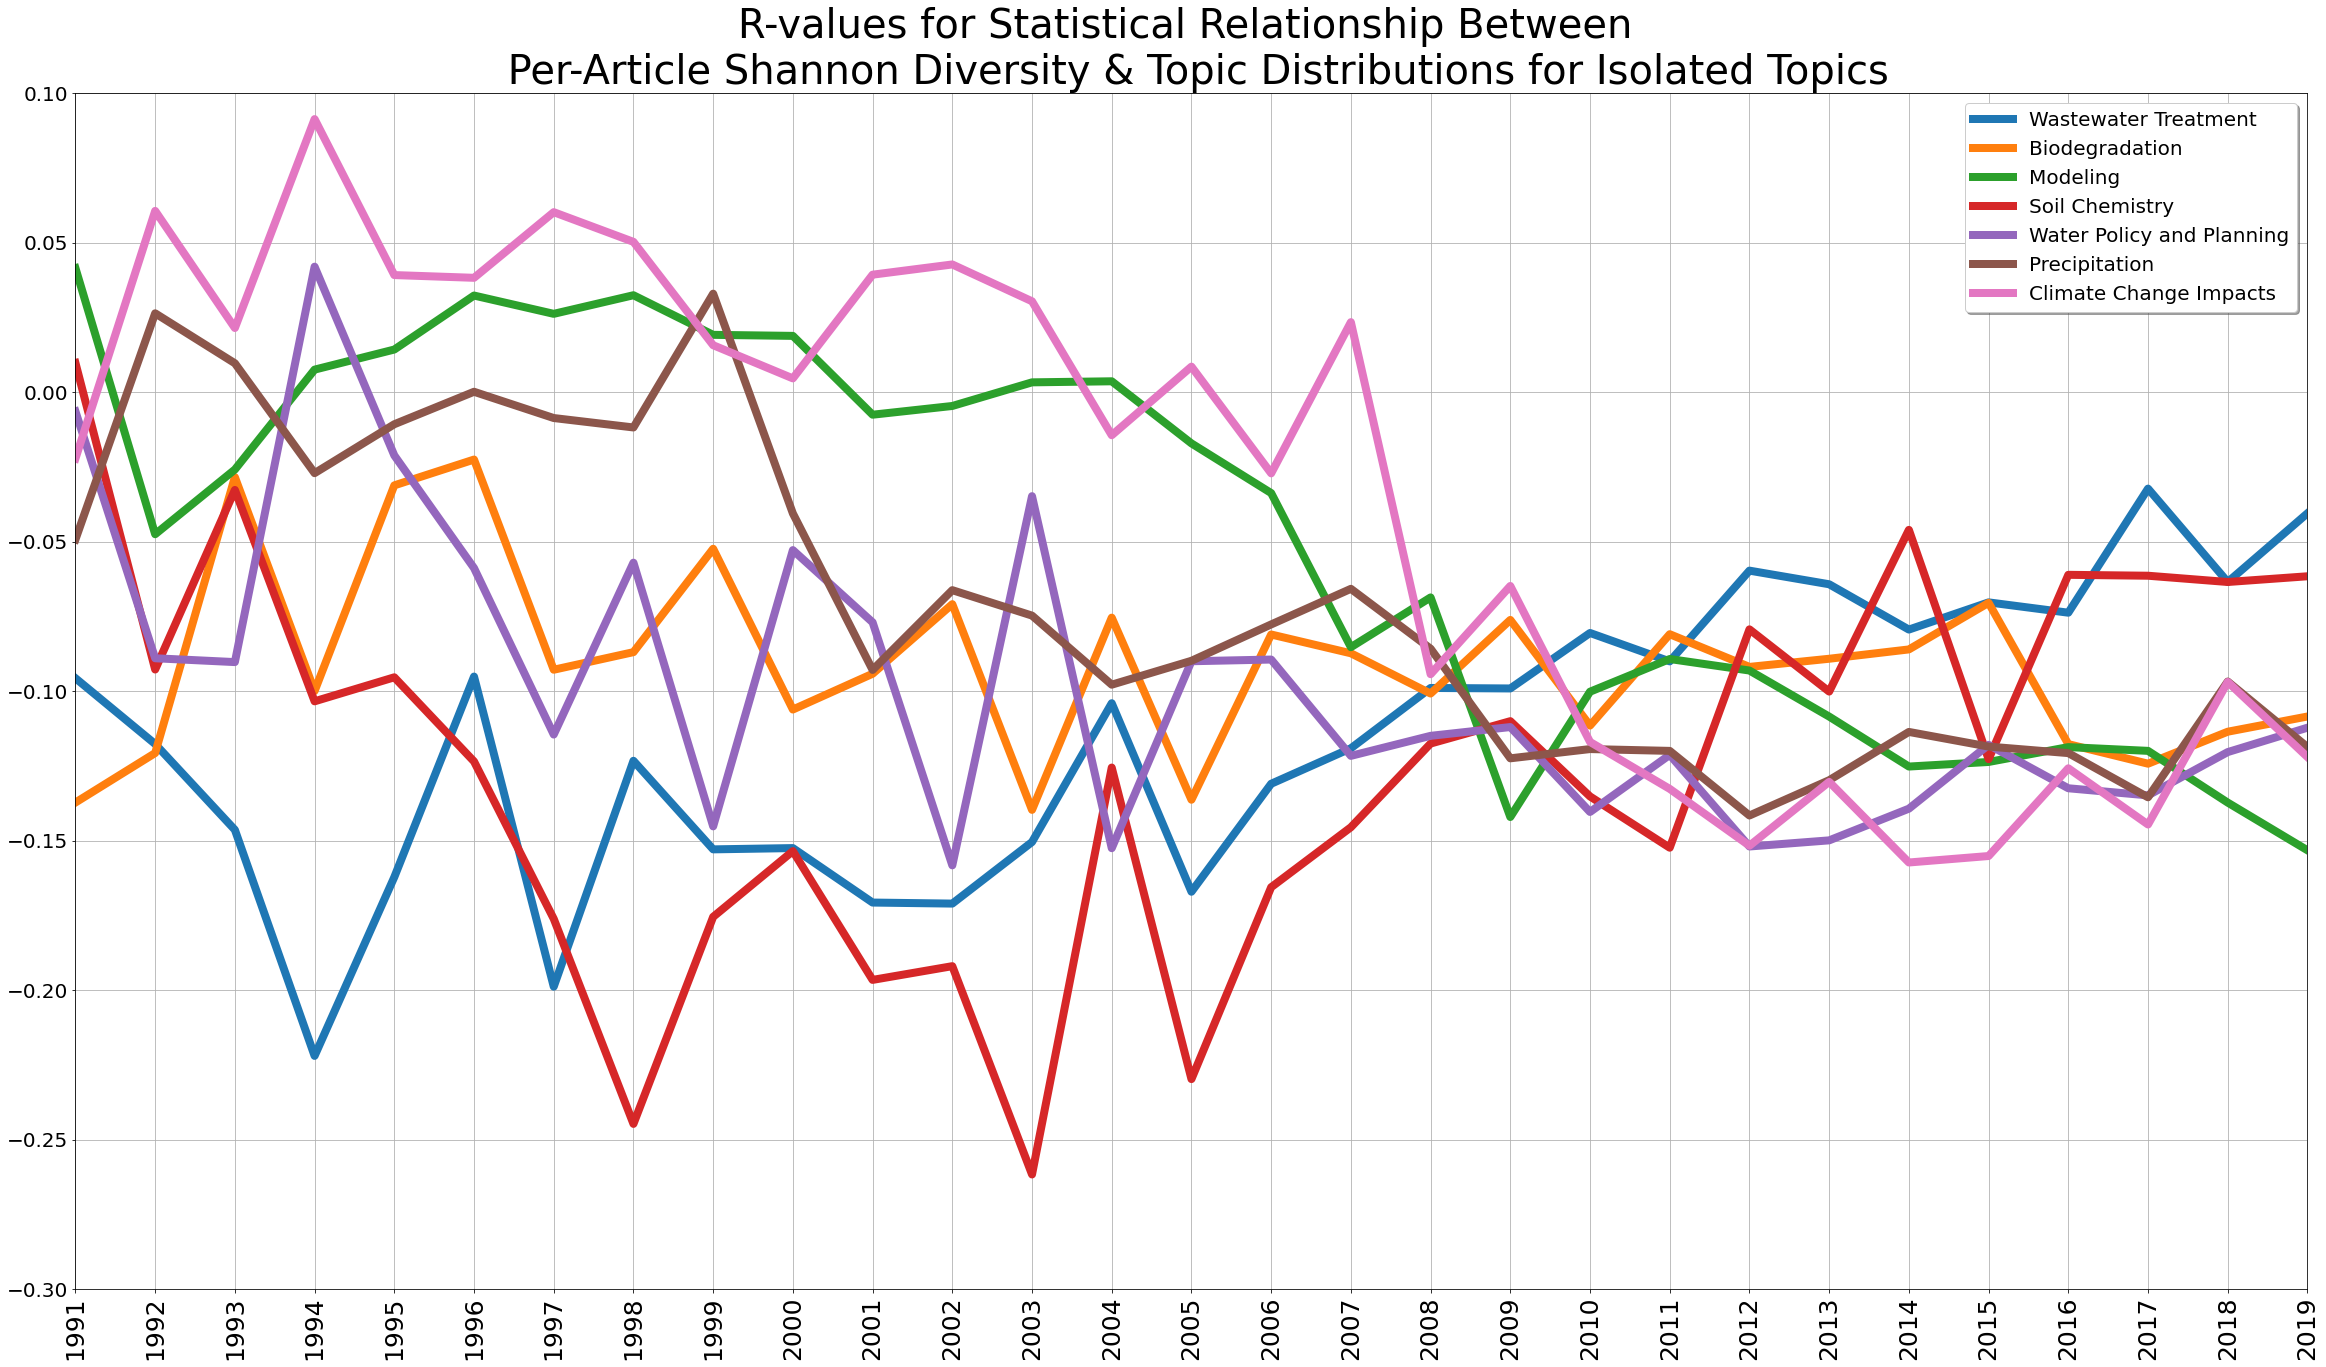

In [69]:
# Statistical Relationship Between Per-Article Shannon Diversity & Topic Distributions for Isolated Topics

isolated_dict = {}

for year in years:
    isolated_dict[year] = {}
    for isolated in isolated_list:
        isolated_dict[year][isolated] = year_diversity_correlation_dict[year][isolated]


df = pd.DataFrame(isolated_dict).transpose()
plt.figure(figsize=(40,22))
plt.plot(df[:-1], linewidth = 8)
plt.xticks(size = 25, rotation = 90)
plt.yticks(size = 20)
plt.ylim(-0.3, 0.1)
plt.xlim(0,28)
plt.legend(df, prop={'size': 20}, loc = 'best', shadow = True, fancybox = True)
plt.grid()
plt.title('R-values for Statistical Relationship Between \n Per-Article Shannon Diversity & Topic Distributions for Isolated Topics', size = 40)
plt.savefig('figures/isolated_trend_shannon.png')


In [70]:
# calculating statistical significance of the above relationships

for top in isolated_list:
    trend_df = pg.corr(np.array(range(0,29,1)), np.array(df[top])[:-1])
    print(top,',', trend_df['r'][0],',',trend_df['p-val'][0],',',trend_df['BF10'][0])
    

Wastewater Treatment , 0.7314662091241624 , 6.544938647272144e-06 , 3602.159
Biodegradation , -0.2658072998592499 , 0.16341678724495828 , 0.583
Modeling , -0.8758269851233784 , 4.930004537843894e-10 , 2.12e+07
Soil Chemistry , 0.1743533859564479 , 0.36568946347370007 , 0.341
Water Policy and Planning , -0.6329973325227713 , 0.0002285510340335868 , 147.565
Precipitation , -0.8587174374932399 , 2.5338107120421903e-09 , 4.711e+06
Climate Change Impacts , -0.8659696402867314 , 1.301133345700246e-09 , 8.689e+06


In [40]:
isolated_dict_journal = {}

for journal in journals:
    isolated_dict_journal[journal] = {}
    for isolated in isolated_list:
        isolated_dict_journal[journal][isolated] = journal_diversity_correlation_dict['shannon'][journal][isolated]


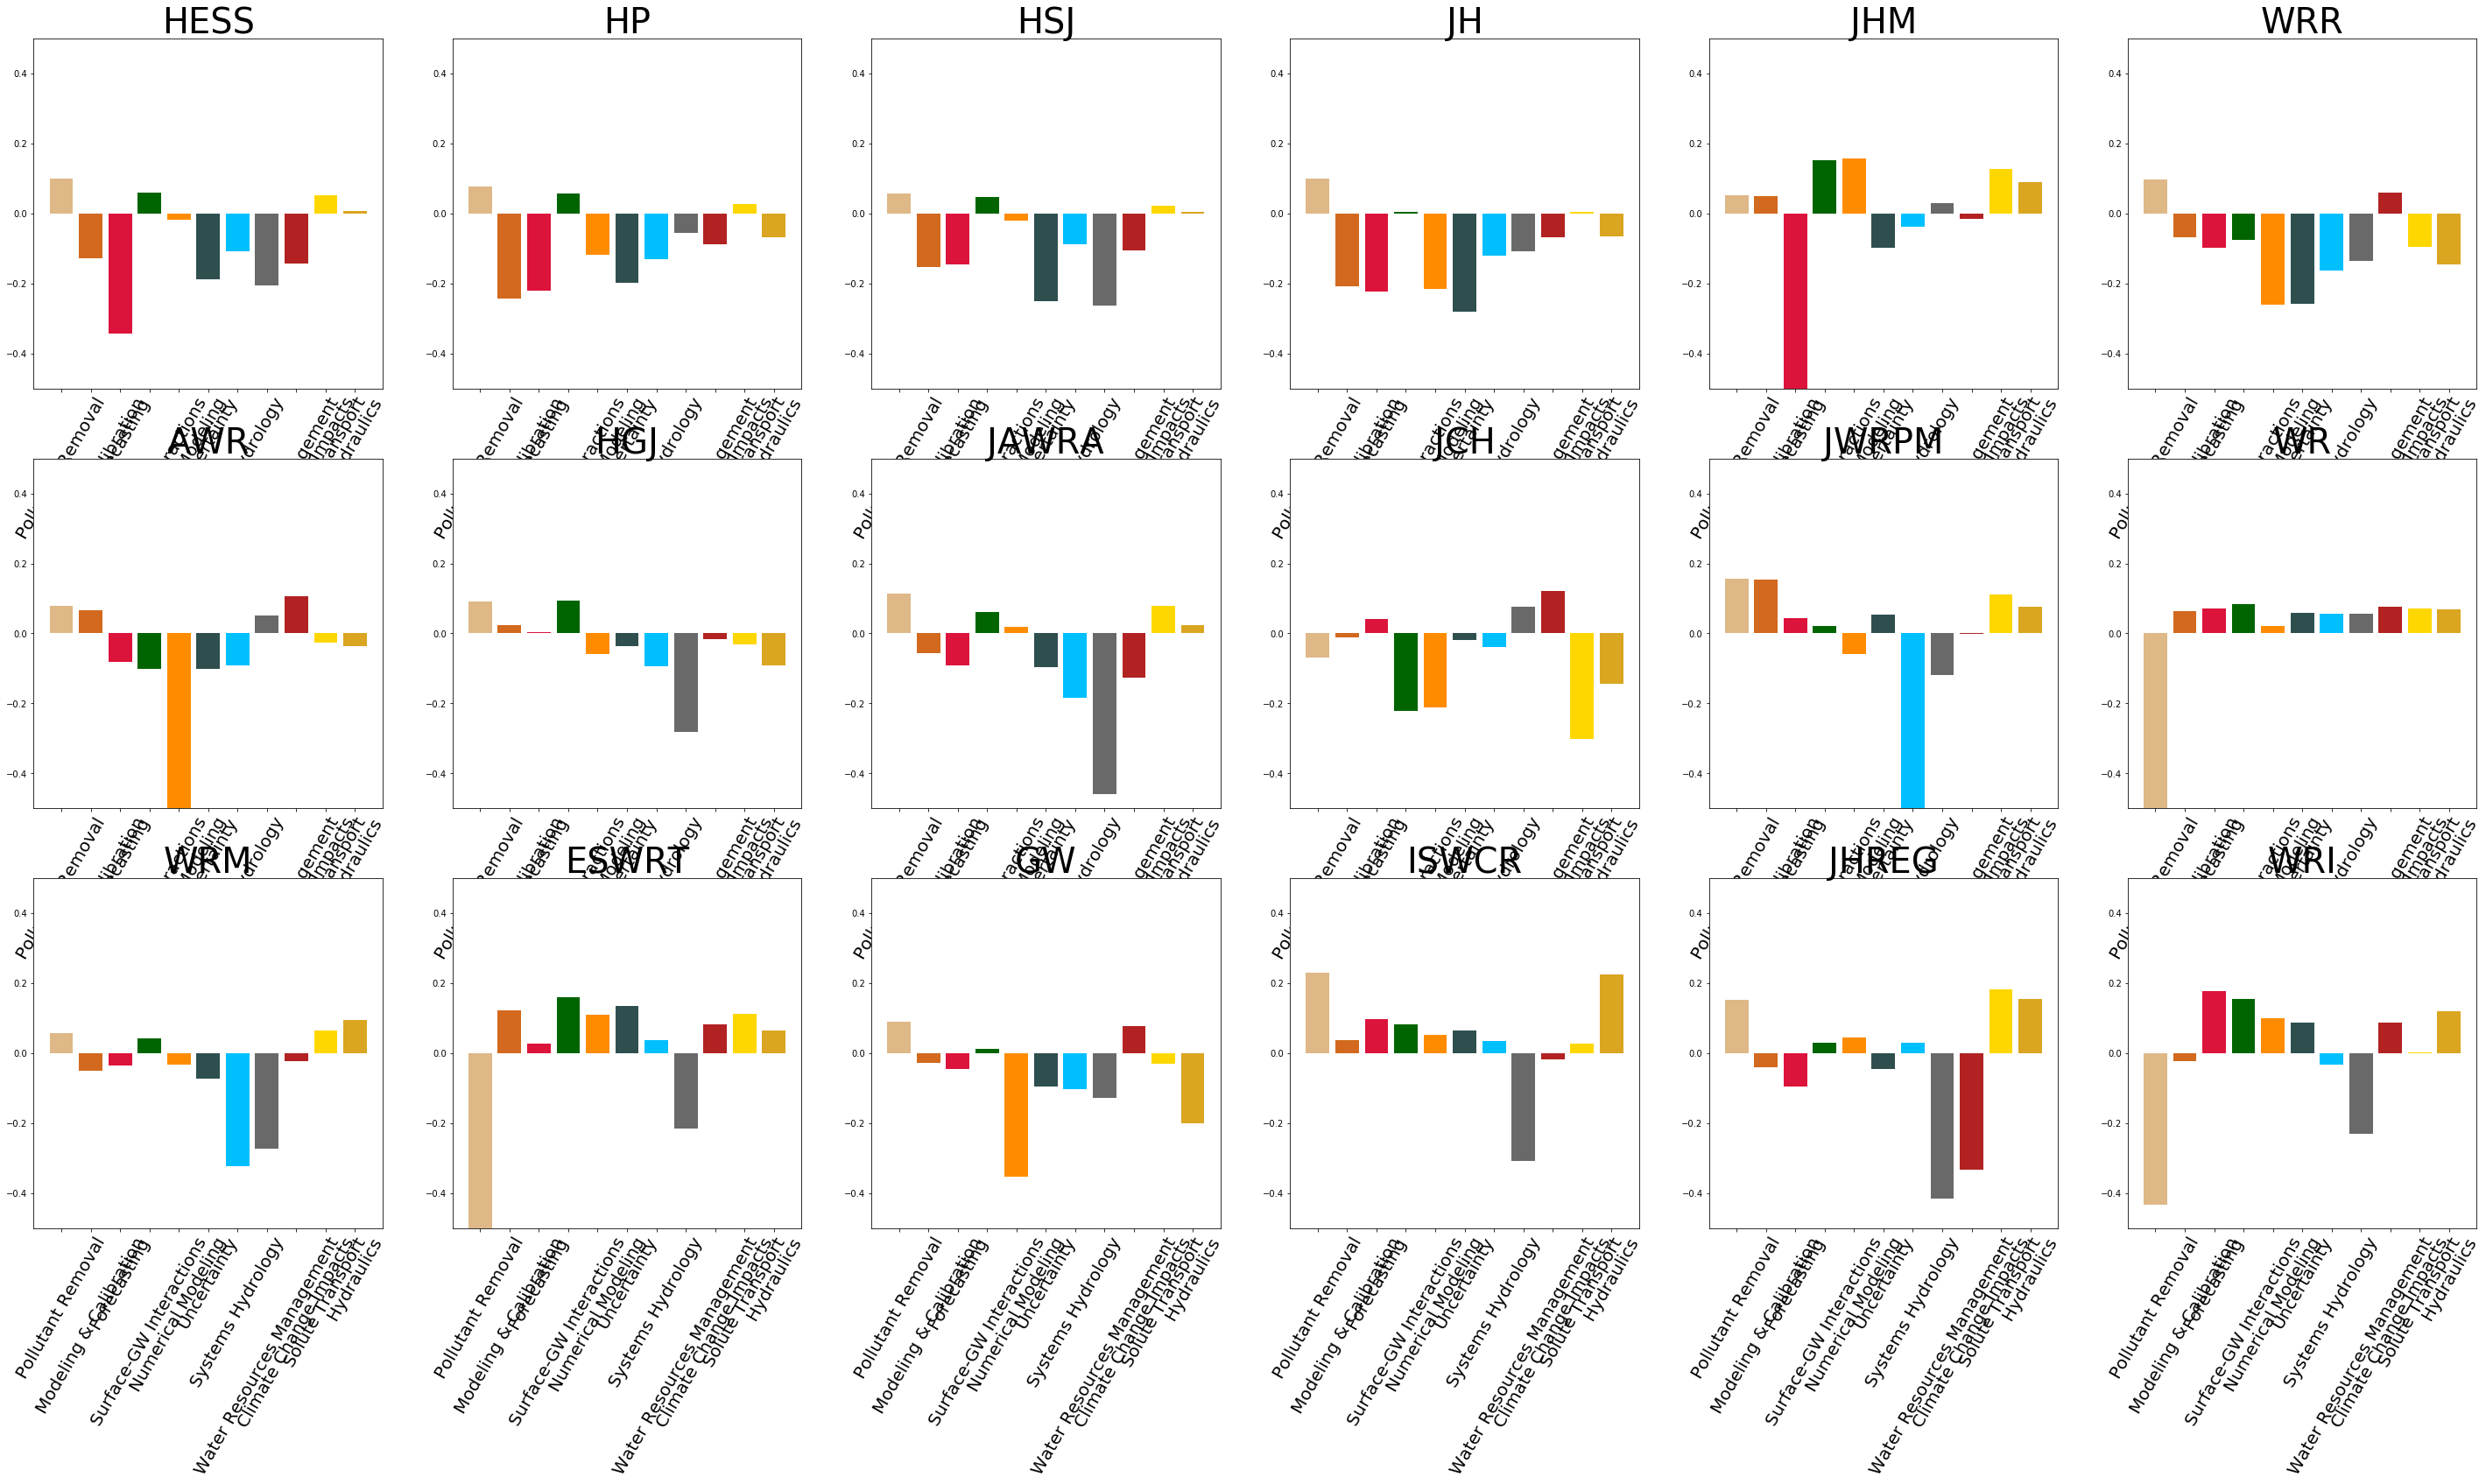

In [41]:
fig = plt.figure(figsize=(50,25), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

for journal in journals:
    ax = fig.add_subplot(3, 6, plot_number)
    ax.bar(isolated_list, isolated_dict_journal[journal].values(), color = list(custom_colors.values()))
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=10)
    ax.set_ylim(-0.5,0.5)
    ax.set_title(journal, size = 40)
    plt.xticks(rotation=60)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.savefig('figures/isolated_journal_shannon.png')